In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [192]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR67xhoAkjEvKTiy5Movr0s7scp0Z8H-rzPW-lM7upIJtDK6lCvDCWUypk9s5EJrr9l3eRVtmtuGmI5/pub?gid=1228674889&single=true&output=csv')
df_unseen = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR67xhoAkjEvKTiy5Movr0s7scp0Z8H-rzPW-lM7upIJtDK6lCvDCWUypk9s5EJrr9l3eRVtmtuGmI5/pub?gid=598844070&single=true&output=csv')

In [193]:
df

,id,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1,1.18,3.02,9.50,D,1.23,810.89,4180.73,152.16,674.74
1,2,5.92,3.03,9.92,A,23.34,419.94,747.48,336.24,931.36
2,3,7.32,3.54,13.18,B,5.39,348.00,1814.33,369.86,1630.72
3,4,8.80,0.23,7.79,A,23.59,223.98,2296.12,226.97,433.03
4,5,2.56,2.29,10.51,D,4.36,619.53,2930.18,339.87,1534.46
...,...,...,...,...,...,...,...,...,...,...
135,136,5.64,1.00,5.90,B,5.59,463.91,1471.13,22.59,-63.60
136,137,9.32,1.96,10.45,A,27.85,91.40,3869.41,65.16,-534.80
137,138,3.12,4.53,1.16,C,23.16,239.20,3036.52,175.38,106.00
138,139,4.93,2.60,13.03,B,21.93,817.99,1840.87,14.51,-624.54


In [194]:
df_unseen

,id,x1,x2,x3,x4,x5,x6,x7,x8
0,141,5.48,1.85,7.34,B,21.00,754.43,90.73,152.59
1,142,6.32,0.64,12.69,B,7.66,55.44,3244.73,359.84
2,143,8.11,3.47,12.64,E,1.34,142.61,2861.21,98.78
3,144,0.79,0.28,12.73,D,12.32,793.89,2163.24,119.44
4,145,5.92,1.13,8.78,E,7.37,118.58,999.02,257.55
5,146,4.49,1.86,14.76,E,13.01,385.80,3560.56,14.34
6,147,6.64,3.67,11.77,E,6.56,815.28,2315.78,208.08
7,148,7.53,2.54,11.28,E,24.03,928.12,1773.88,323.28
8,149,4.21,4.03,14.60,A,12.62,14.13,4770.95,353.67
9,150,6.18,2.58,13.48,A,18.72,305.07,1813.56,207.66


In [195]:
df.info()
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      140 non-null    int64  
 1   x1      139 non-null    float64
 2   x2      140 non-null    float64
 3   x3      140 non-null    float64
 4   x4      140 non-null    object 
 5   x5      140 non-null    float64
 6   x6      139 non-null    float64
 7   x7      140 non-null    float64
 8   x8      140 non-null    float64
 9   y       140 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10 non-null     int64  
 1   x1      10 non-null     float64
 2   x2      10 non-null     float64
 3   x3      10 non-null     float64
 4   x4      10 non-null     object 
 5   x5      10 non-null    

In [196]:
df.describe()


,id,x1,x2,x3,x5,x6,x7,x8,y
count,140.0000,139.000000,140.000000,140.000000,140.000000,139.000000,140.000000,140.000000,140.000000
mean,70.5000,5.287266,2.465643,7.749429,15.304143,485.509353,2572.986786,248.534500,746.765071
std,40.5586,2.989303,1.496873,4.542832,8.702078,280.528298,1395.140872,136.773126,756.563035
min,1.0000,0.190000,0.130000,0.100000,0.240000,31.440000,10.130000,1.610000,-788.810000
25%,35.7500,2.650000,1.207500,3.675000,8.040000,244.580000,1516.057500,141.067500,57.727500
50%,70.5000,5.640000,2.410000,8.395000,15.120000,479.280000,2531.480000,252.630000,751.095000
75%,105.2500,7.980000,3.765000,11.725000,23.205000,708.410000,3742.345000,363.645000,1398.822500
max,140.0000,9.970000,5.000000,14.940000,29.750000,997.260000,4932.780000,498.960000,2232.790000


In [197]:
df_unseen.describe()

,id,x1,x2,x3,x5,x6,x7,x8
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,145.50000,5.56700,2.205000,12.007000,12.463000,431.335000,2359.366000,209.523000
std,3.02765,2.06472,1.286056,2.372093,7.100424,356.619432,1332.192635,115.635004
min,141.00000,0.79000,0.280000,7.340000,1.340000,14.130000,90.730000,14.340000
25%,143.25000,4.73750,1.310000,11.402500,7.442500,124.587500,1783.800000,127.727500
50%,145.50000,6.05000,2.200000,12.665000,12.470000,345.435000,2239.510000,207.870000
75%,147.75000,6.56000,3.247500,13.292500,17.292500,784.025000,3148.850000,306.847500
max,150.00000,8.11000,4.030000,14.760000,24.030000,928.120000,4770.950000,359.840000


In [198]:
# delete id column
# df = df.drop('id', axis=1)
# df_unseen = df_unseen.drop('id', axis=1)

In [199]:
# insert null value with mean x1
df['x1'].fillna(df['x1'].mean(), inplace=True)
# drop null value in x1
# df.dropna(subset=['x1'], inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      140 non-null    int64  
 1   x1      140 non-null    float64
 2   x2      140 non-null    float64
 3   x3      140 non-null    float64
 4   x4      140 non-null    object 
 5   x5      140 non-null    float64
 6   x6      139 non-null    float64
 7   x7      140 non-null    float64
 8   x8      140 non-null    float64
 9   y       140 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.1+ KB


In [201]:
# insert null value with mean x6
df['x6'].fillna(df['x6'].mean(), inplace=True)
# drop null value in x6
# df.dropna(subset=['x6'], inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      140 non-null    int64  
 1   x1      140 non-null    float64
 2   x2      140 non-null    float64
 3   x3      140 non-null    float64
 4   x4      140 non-null    object 
 5   x5      140 non-null    float64
 6   x6      140 non-null    float64
 7   x7      140 non-null    float64
 8   x8      140 non-null    float64
 9   y       140 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.1+ KB


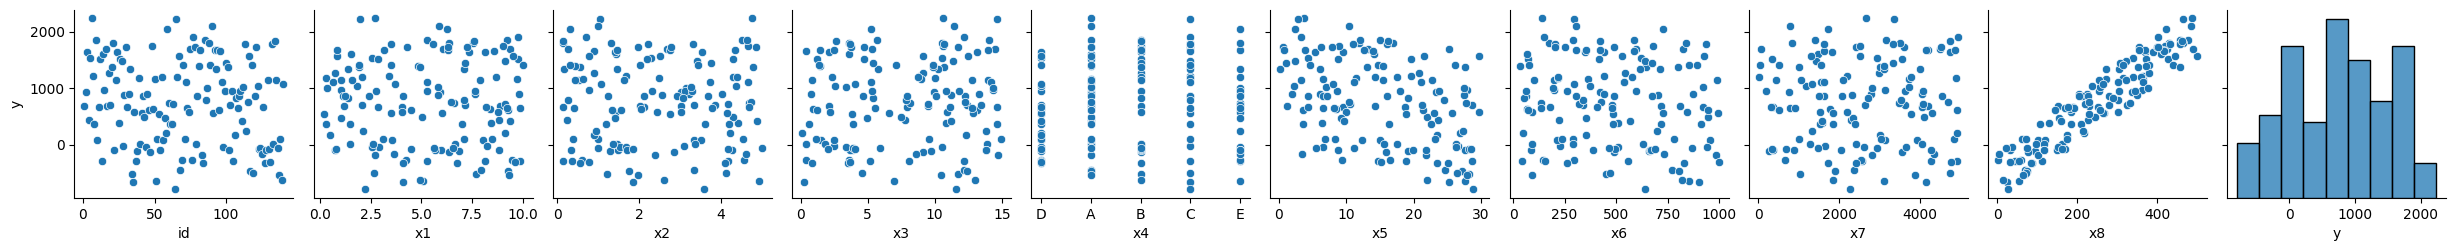

In [203]:
# check data exploration
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17880\1238583701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


<AxesSubplot: xlabel='y', ylabel='Density'>

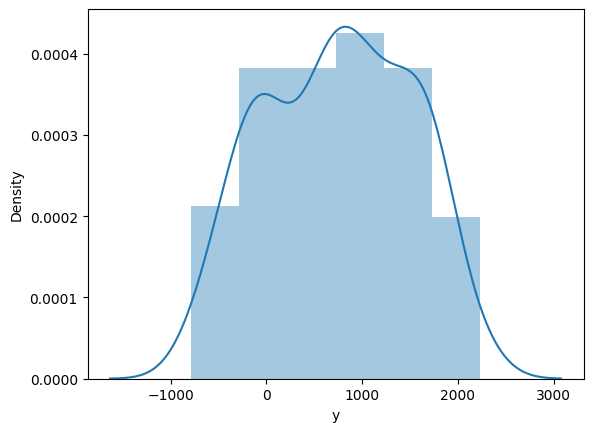

In [204]:
sns.distplot(df['y'])

In [205]:
# choose x5,(x6 is bairly), x8 as feature
# x5 = 	-0.431582
# x6 = 	-0.136618
# x8 =   0.939352
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17880\291646549.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,x1,x2,x3,x5,x6,x7,x8,y
id,1.000000,-0.094935,-0.002113,-0.050251,0.007897,0.046174,-0.075041,-0.150174,-0.138234
x1,-0.094935,1.000000,-0.078729,-0.064133,-0.072058,0.008397,0.127196,-0.058470,-0.025030
x2,-0.002113,-0.078729,1.000000,-0.005577,-0.055523,0.037925,0.006289,-0.037747,-0.054242
x3,-0.050251,-0.064133,-0.005577,1.000000,0.025709,0.164306,-0.073397,0.081529,0.064706
x5,0.007897,-0.072058,-0.055523,0.025709,1.000000,-0.035199,-0.006246,-0.098508,-0.431582
x6,0.046174,0.008397,0.037925,0.164306,-0.035199,1.000000,-0.016818,-0.162926,-0.136618
x7,-0.075041,0.127196,0.006289,-0.073397,-0.006246,-0.016818,1.000000,-0.012542,-0.009634
x8,-0.150174,-0.058470,-0.037747,0.081529,-0.098508,-0.162926,-0.012542,1.000000,0.939352
y,-0.138234,-0.025030,-0.054242,0.064706,-0.431582,-0.136618,-0.009634,0.939352,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17880\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

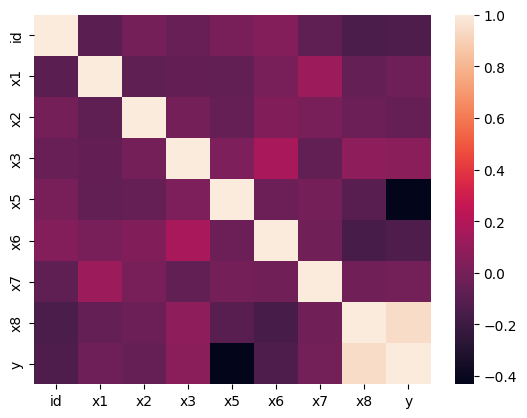

In [206]:
sns.heatmap(df.corr())

In [207]:
df.corr().apply(lambda x:abs(x)).sort_values("y", ascending=False)[["y"]]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17880\4150759196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().apply(lambda x:abs(x)).sort_values("y", ascending=False)[["y"]]


,y
y,1.000000
x8,0.939352
x5,0.431582
id,0.138234
x6,0.136618
x3,0.064706
x2,0.054242
x1,0.025030
x7,0.009634


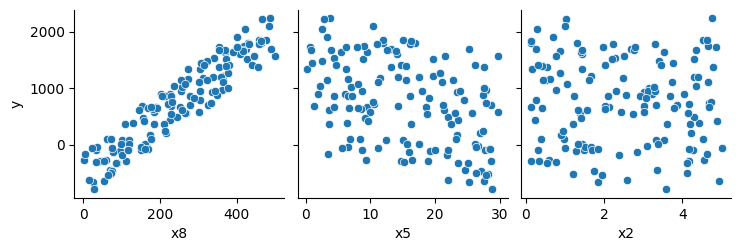

In [208]:
selectColumns = ['x8','x5','x2']
sns.pairplot(df, x_vars=selectColumns, y_vars=["y"])

## Select Data

In [209]:
X = df[selectColumns]
y = df["y"]

In [210]:
X

,x8,x5,x2
0,152.16,1.23,3.02
1,336.24,23.34,3.03
2,369.86,5.39,3.54
3,226.97,23.59,0.23
4,339.87,4.36,2.29
...,...,...,...
135,22.59,5.59,1.00
136,65.16,27.85,1.96
137,175.38,23.16,4.53
138,14.51,21.93,2.60


In [211]:
y

0       674.74
1       931.36
2      1630.72
3       433.03
4      1534.46
        ...   
135     -63.60
136    -534.80
137     106.00
138    -624.54
139    1072.51
Name: y, Length: 140, dtype: float64

## Train with split

In [212]:
# Randome train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [213]:
y_test

139    1072.51
97      -36.08
134    1144.33
110     418.47
81     1680.60
26     1478.49
35      577.57
32     1336.41
84     1845.84
95     1653.14
25     1513.45
69     1402.55
40      550.98
28      881.35
125     669.76
133    1835.40
99     1441.76
117    1408.51
11     1521.47
46     -138.66
51      107.39
101     -88.54
136    -534.80
121    1037.48
37     -113.48
21      -95.91
89     2104.99
119     859.35
118    -498.79
29     1730.62
96     1104.64
52      534.32
45      604.51
106     817.48
92     1336.14
Name: y, dtype: float64

In [214]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))

len(X_train) :  105
len(X_test) :  35
len(y_train) :  105
len(y_test) :  35


In [215]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [216]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0, len(X.columns)):
    print("", lm.coef_[i], "*", X.columns[i], "   +")
print("", lm.intercept_)

LM MODEL

y =
 4.999875857148001 * x8    +
 -29.970186316355285 * x5    +
 -19.809073054112773 * x2    +
 11.626251605815241


In [217]:
y_pred = lm.predict(X_test)

In [218]:
y_pred

array([1072.48826808,  -37.46496942, 1144.53161984,  421.12621919,
       1682.62286215, 1479.76069381,  578.02741643, 1337.90563564,
       1845.6634581 , 1654.40959798, 1511.72946981, 1400.62754077,
        549.57513783,  883.79139238,  668.92645741, 1833.72756564,
       1439.33648965, 1405.76265142, 1522.81325285, -138.86303114,
        108.04899778,  -87.37716258, -536.07730964, 1037.5973532 ,
       -113.16904827,  -97.6838037 , 2104.06560297,  859.03260971,
       -498.20802866, 1729.79049957, 1105.1357441 ,  534.88375428,
        604.36859127,  818.84797744, 1336.47646424])

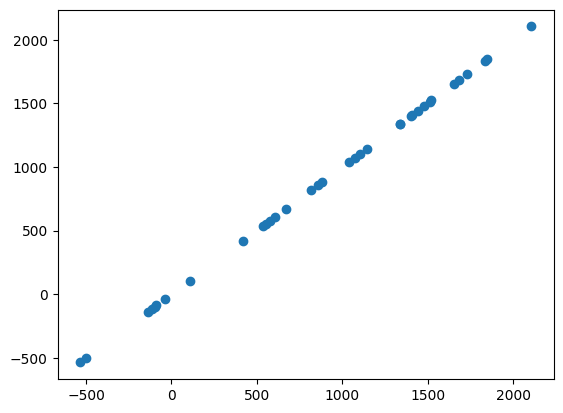

In [219]:
plt.scatter(y_test,y_pred)

In [220]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)

RMSE =  1.34572764338823


In [221]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  0.328151801316973 %


In [222]:
# predict unseen data
y_unseen_pred = lm.predict(df_unseen[selectColumns]);

In [223]:
y_unseen_pred

array([ 108.53661085, 1568.5321461 ,  396.61645561,  234.03218811,
       1056.07975291, -343.43252846,  782.69669962,  857.48749597,
       1321.87803028,  437.75117578])

## K-fold

In [224]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [225]:
X = df[selectColumns]
y = df["y"]

In [226]:
k = 5
kf = KFold(n_splits=k)

In [227]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  #print("  TRAIN:", train_index[0:10],"...")
  #print("  TEST:", test_index[0:5],"...")

  # (5.1) to split train and test datasets
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  # (5.2) to train and create a linear regression model
  lm = LinearRegression()
  lm.fit(X_train,y_train)
  print("  intercept: ", lm.intercept_, " ; coef: ", lm.coef_)

  # (6.1) to predict from the test set
  y_pred = lm.predict(X_test)

  # (6.2) to evaluate with some evaluation methods
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)



  print("------------------------------------")
  round_num+=1

Round 1
  intercept:  11.70167314666105  ; coef:  [  5.00069882 -29.97206744 -19.84457706]
  RMSE =  1.6345795653254571
------------------------------------
Round 2
  intercept:  11.291018025127755  ; coef:  [  5.00125874 -29.97524016 -19.81397509]
  RMSE =  1.4943624415959693
------------------------------------
Round 3
  intercept:  11.772463959177003  ; coef:  [  4.99920066 -29.9702072  -19.83391026]
  RMSE =  1.577240138298873
------------------------------------
Round 4
  intercept:  11.7359738971752  ; coef:  [  4.99943235 -29.96478853 -19.82965508]
  RMSE =  1.4640186304187097
------------------------------------
Round 5
  intercept:  11.838050751390142  ; coef:  [  4.99961938 -29.96809275 -19.88356151]
  RMSE =  1.2095078703617719
------------------------------------


In [228]:
print(RMSEs)

[1.6345795653254571, 1.4943624415959693, 1.577240138298873, 1.4640186304187097, 1.2095078703617719]


In [229]:
kfold_rmse = np.array(RMSEs).mean()

In [230]:
print("K-Fold CV", "RMSE = ", kfold_rmse)

K-Fold CV RMSE =  1.4759417292001562


## Check Answer

In [231]:
df_answer = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR67xhoAkjEvKTiy5Movr0s7scp0Z8H-rzPW-lM7upIJtDK6lCvDCWUypk9s5EJrr9l3eRVtmtuGmI5/pub?gid=79321423&single=true&output=csv')

In [232]:
y_unseen_test = df_answer["y"]
df_unseen["y_test"] = df_answer["y"]

In [233]:
df_unseen["y_pred"] = y_unseen_pred

In [234]:
df_unseen[["y_test","y_pred"]]

,y_test,y_pred
0,110.85,108.536611
1,1568.75,1568.532146
2,394.73,396.616456
3,232.83,234.032188
4,1058.11,1056.079753
5,-342.08,-343.432528
6,784.16,782.696700
7,857.91,857.487496
8,1323.03,1321.878030
9,438.17,437.751176


In [235]:
rmse = metrics.mean_squared_error(y_unseen_test, y_unseen_pred, squared=False)
print("RMSE = ", rmse)

RMSE =  1.4204450989913453


In [236]:
mape = np.mean(np.abs((y_unseen_test - y_unseen_pred) / y_unseen_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  0.41008587377922734 %


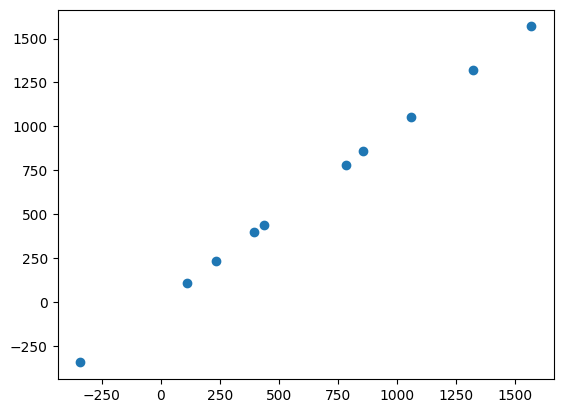

In [237]:
plt.scatter(y_unseen_test,y_unseen_pred)